# 01ZLMA - Exercise 11
Exercise 11 of the course 01ZLMA. 

## Contents

* Log-linear models with Poisson distributed data
 ---


Dataset and example from Chapter 10

Peter K. Dunn • Gordon K. Smyth, Generalized Linear ModelsWith Examples in R

https://link.springer.com/content/pdf/10.1007%2F978-1-4419-0118-7.pdf

Example 10.1.: As a numerical example, consider the number of incidents of
lung cancer from 1968 to 1971 in four Danish cities. The number of cases of lung cancer in each age group is remarkably similar for Fredericia. However, using the number of cases does not accurately reflect the information in the data, because five times as many people are in the 40–54 age group than in the
over-75 age group. Understanding the data is enhanced by considering the
rate of lung cancer, such as the number of lung cancer cases per unit of population.

In [4]:
# import data from R to xlsx -> downloaded in files in google colab
'''
install.packages("writexl")
library("writexl")
write_xlsx(danishlc, "danishlc.xlsx")
'''

'\ninstall.packages("writexl")\nlibrary("writexl")\nwrite_xlsx(danishlc, "danishlc.xlsx")\n'

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats

In [6]:
# import dataset -> put dataset in files in google colab
danishhlc = pd.read_excel('/content/danishlc.xlsx')
danishhlc

,Cases,Pop,Age,City,Rate,AgeNum
0,11,3059,40-54,Fredericia,3.595946,40
1,11,800,55-59,Fredericia,13.750000,55
2,11,710,60-64,Fredericia,15.492958,60
3,10,581,65-69,Fredericia,17.211704,65
4,11,509,70-74,Fredericia,21.611002,70
5,10,605,>74,Fredericia,16.528926,75
6,13,2879,40-54,Horsens,4.515457,40
7,6,1083,55-59,Horsens,5.540166,55
8,15,923,60-64,Horsens,16.251354,60
9,10,834,65-69,Horsens,11.990408,65


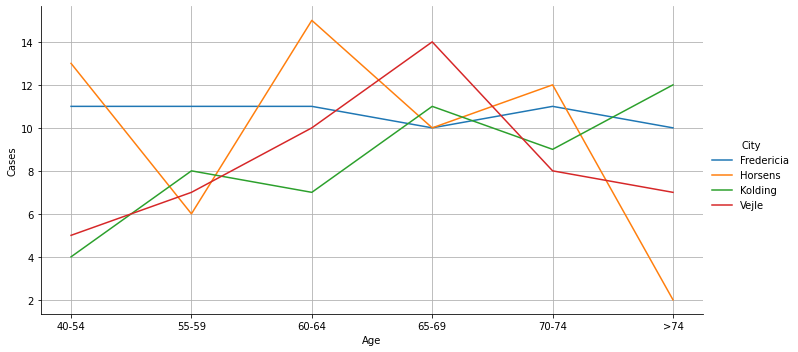

In [7]:
sns.relplot(x=danishhlc['Age'], y=danishhlc['Cases'], aspect=2, hue = danishhlc['City'], kind="line")
plt.grid()

The plots show no clear pattern by city, but the
lung cancer rate appears to grow steadily for older age groups for each city,
then falls away for the `>74` age group. The lung cancer rate for Horsens in
the `>74` age group seems very low.

### Poission regression recap:

We assume:

$Y_i \sim Po(\lambda_i s_i)$

$log(\lambda_i) = x_i^T \beta$

$E[Y_i] = \lambda_i s_i = s_i exp(x_i^T \beta) = exp(ln(s_i) + x_i^T \beta)$ 

$\lambda_i = \frac{E[Y_i]}{s_i}$

We will estimate coefficients $β_j$'s, but we don't have to estimate parameters for an offset term $ln(si)$.



In [8]:
log_pop = np.log(danishhlc['Pop'])

In [9]:
mdl = smf.glm('Cases ~  City + Age', data=danishhlc, family=sm.families.Poisson(link=sm.families.links.log), offset = log_pop).fit()
print(mdl.summary())
# missing interaction Cases ~  City + Age + City:Age -> error: Perfect separation detected, results not available

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Cases   No. Observations:                   24
Model:                            GLM   Df Residuals:                       15
Model Family:                 Poisson   Df Model:                            8
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.918
Date:                Tue, 27 Sep 2022   Deviance:                       23.447
Time:                        13:19:42   Pearson chi2:                     22.6
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.6321      0.200    -

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


Question: Compare previous model with saturated one.

In [10]:
# mdl_2 = saturated model -> error: Perfect separation detected, results not available

In [11]:
# missing -> anova

Keep only `Age`

In [12]:
# Drop City
mdl_3 = smf.glm('Cases ~  Age', data=danishhlc, family=sm.families.Poisson(link=sm.families.links.log), offset = log_pop).fit()
print(mdl_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Cases   No. Observations:                   24
Model:                            GLM   Df Residuals:                       18
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.347
Date:                Tue, 27 Sep 2022   Deviance:                       28.307
Time:                        13:19:42   Pearson chi2:                     26.0
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.8623      0.174    -33.676   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  


Mutate dataset to have Age as quantitative. Using the lower class boundary of each class, since all classes have a lower
boundary.

In [13]:
danishhlc['AgeNum'] = [40, 55, 60, 65, 70, 75,40, 55, 60, 65, 70, 75,40, 55, 60, 65, 70, 75,40, 55, 60, 65, 70, 75]
danishhlc.head()

,Cases,Pop,Age,City,Rate,AgeNum
0,11,3059,40-54,Fredericia,3.595946,40
1,11,800,55-59,Fredericia,13.750000,55
2,11,710,60-64,Fredericia,15.492958,60
3,10,581,65-69,Fredericia,17.211704,65
4,11,509,70-74,Fredericia,21.611002,70


Question: Discuss the application of different boundaries: lower, midpoint, upper.

In [14]:
mdl_4 = smf.glm('Cases ~ AgeNum', data=danishhlc, family=sm.families.Poisson(link=sm.families.links.log), offset = log_pop).fit()
print(mdl_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Cases   No. Observations:                   24
Model:                            GLM   Df Residuals:                       22
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -72.678
Date:                Tue, 27 Sep 2022   Deviance:                       48.968
Time:                        13:19:42   Pearson chi2:                     42.9
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.4667      0.340    -21.956      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [15]:
# missing ANOVA

In [16]:
mdl_5 = smf.glm('Cases ~ AgeNum^2 + AgeNum', data=danishhlc, family=sm.families.Poisson(link=sm.families.links.log), offset = log_pop).fit()
print(mdl_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Cases   No. Observations:                   24
Model:                            GLM   Df Residuals:                       21
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -70.720
Date:                Tue, 27 Sep 2022   Deviance:                       45.052
Time:                        13:19:42   Pearson chi2:                     39.7
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.9725      0.432    -18.457      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  """Entry point for launching an IPython kernel.


In [17]:
def ANOVA(small_model, big_model):
    """Given two fitted GLMs, the larger of which contains the parameter space of the smaller, return the F Stat and P value corresponding to the larger model adding explanatory power"""
    addtl_params = big_model.df_model - small_model.df_model
    f_stat = (small_model.deviance - big_model.deviance) / (addtl_params * big_model.scale)
    df_numerator = addtl_params
    # use fitted values to obtain n_obs from model object:
    df_denom = (big_model.fittedvalues.shape[0] - big_model.df_model)
    p_value = stats.f.sf(f_stat, df_numerator, df_denom)
    return (f_stat, p_value)

In [18]:
ANOVA(mdl_4,mdl_5)

(3.9154394062098703, 0.06049757910967295)

The quadratic model is significant improvement compare to linear one.

Just for academic purpose: Check the deviance by hand computation

In [19]:
y = danishhlc['Cases']
mu_hat5 = mdl_5.fittedvalues
dev_stat_m5 = 2*sum(y*np.log(y/mu_hat5) - (y - mu_hat5))
print(dev_stat_m5)
print(mdl_5.deviance)

45.052079338328745
45.052079338328745


### *Results*

Compare models with numerical `AgeNum` and with categorical `Age` variable by AIC and create summary table of outputs from all models

Both models, with factor varialbe `Age` and with quadratic `AgeNum` are reasonably adequate.

Plot deviance residuals against fitted values

In [20]:
rds_3 = mdl_3.resid_deviance
fitted_3 = mdl_3.fittedvalues

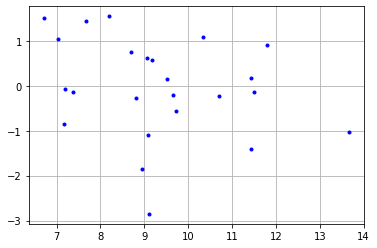

In [21]:
plt.plot(fitted_3, rds_3, 'b.')
plt.grid()

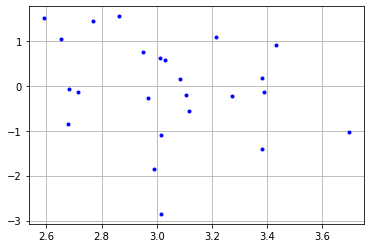

In [22]:
plt.plot(np.sqrt(fitted_3), rds_3, 'b.')
plt.grid()

In [23]:
rds_5 = mdl_5.resid_deviance
fitted_5 = mdl_5.fittedvalues

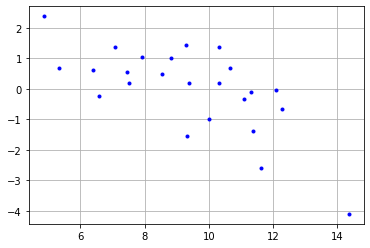

In [24]:
plt.plot(fitted_5, rds_5, 'b.')
plt.grid()

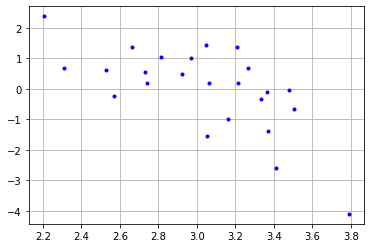

In [25]:
plt.plot(np.sqrt(fitted_5), rds_5, 'b.')
plt.grid()

Question: why to plot sqrt of fitted values istead of fitted values only?

Plot residuals against predictors



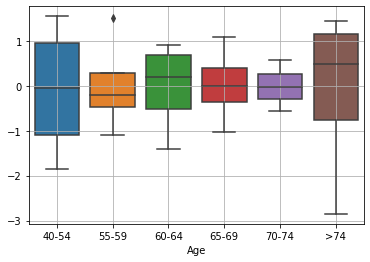

In [26]:
sns.boxplot(x=danishhlc['Age'], y=rds_3)
plt.grid()

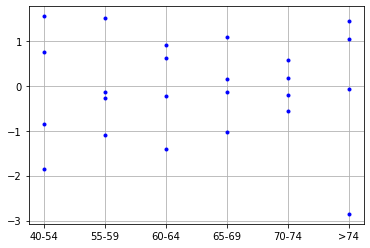

In [27]:
plt.plot(danishhlc['Age'], rds_3, 'b.')
plt.grid()

In [28]:
# missing
'''
scatter.smooth(danishlc$AgeNum,  rstandard(dlc_m2, type='deviance'), col='gray')
scatter.smooth(danishlc$Age, rstandard(dlc_m4, type='deviance'), col='gray')
scatter.smooth(danishlc$AgeNum, rstandard(dlc_m4, type='deviance'), col='gray')
scatter.smooth(danishlc$AgeNum^2, rstandard(dlc_m4, type='deviance'), col='gray') 
'''

"\nscatter.smooth(danishlc$AgeNum,  rstandard(dlc_m2, type='deviance'), col='gray')\nscatter.smooth(danishlc$Age, rstandard(dlc_m4, type='deviance'), col='gray')\nscatter.smooth(danishlc$AgeNum, rstandard(dlc_m4, type='deviance'), col='gray')\nscatter.smooth(danishlc$AgeNum^2, rstandard(dlc_m4, type='deviance'), col='gray') \n"

Checking the link function

In [29]:
work_3 = mdl_3.resid_working
work_5 = mdl_5.resid_working

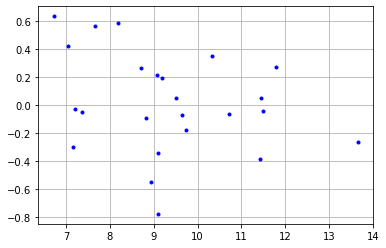

In [30]:
plt.plot(fitted_3, work_3, 'b.')
plt.grid()

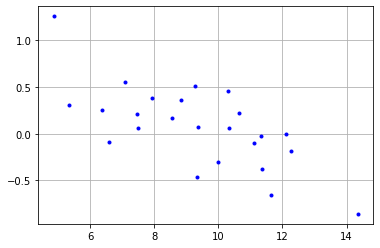

In [31]:
plt.plot(fitted_5, work_5, 'b.')
plt.grid()

Checking if Poisson regression is appropriate

Quantile residuals: 

Dunn and Gordon (2018) introduce quantile residuals for discrete response variables. Their primary benefits are they do not show weird patterns (due to variable’s discreteness).

In [32]:
# missing QQ plots -> fig = sm.qqplot(res, stats.t, fit=True, line="45")

Outliers and influential observations



In [33]:
influence = mdl_3.get_influence()
cooks = influence.cooks_distance
print(cooks)

(array([4.91823827e-02, 1.53027960e-01, 2.32465655e-02, 1.40566213e-03,
       2.31620121e-02, 7.89690446e-02, 2.06710085e-01, 9.72831556e-02,
       7.59121424e-02, 1.02113813e-01, 2.57316532e-03, 5.42327134e-01,
       2.31684215e-01, 6.61675623e-03, 1.41119851e-01, 1.64126683e-03,
       3.08371219e-03, 1.78264295e-01, 3.87779089e-02, 1.21910029e-03,
       3.51381049e-03, 8.39183695e-02, 2.16391707e-02, 3.66233705e-04]), array([0.99937166, 0.98594076, 0.99992837, 0.99999998, 0.99992913,
       0.9976151 , 0.97012152, 0.99577033, 0.99786265, 0.99517566,
       0.9999999 , 0.76935072, 0.96068618, 0.99999826, 0.98859989,
       0.99999997, 0.99999982, 0.97928034, 0.99968246, 0.99999999,
       0.99999974, 0.99717862, 0.99994195, 1.        ]))


In [34]:
hatvalues = mdl_3.get_hat_matrix_diag()
print(hatvalues)

[0.2637069  0.20991866 0.21087021 0.21142649 0.22958954 0.22701689
 0.24818966 0.28417738 0.27413127 0.30349345 0.28597203 0.2934334
 0.27086207 0.27551824 0.26581527 0.25545852 0.2413171  0.24727955
 0.21724138 0.23038573 0.24918325 0.22962154 0.24312134 0.23227017]


In [35]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [36]:
n, npar = danishhlc.shape
line = 8/(n-2*npar)
line_2 = 2*npar/n

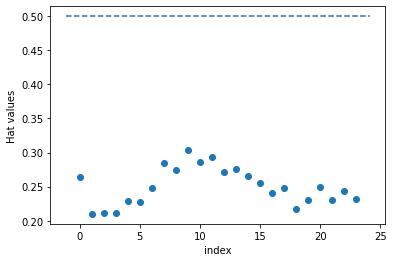

In [37]:
plt.scatter(danishhlc.index, hatvalues)
abline(0, line_2)
plt.xlabel('index')
plt.ylabel('Hat values')
plt.show()

In [38]:
influence = mdl_3.get_influence()
inf_sum = influence.summary_frame()
print(inf_sum)

    dfb_Intercept  dfb_Age[T.55-59]  dfb_Age[T.60-64]  dfb_Age[T.65-69]  \
0    5.432258e-01     -3.811525e-01     -4.086089e-01     -4.126096e-01   
1   -1.980872e-17      6.827494e-01      6.918138e-18     -5.233373e-16   
2   -4.405057e-16     -2.393892e-16      2.460964e-01     -4.144762e-16   
3    2.642489e-16     -1.586264e-17     -4.750733e-18      5.973457e-02   
4   -5.540481e-17     -1.693544e-16     -1.003580e-16     -1.562714e-16   
5   -3.352417e-16      3.914970e-16      1.370252e-16      6.206507e-17   
6    1.113670e+00     -7.814025e-01     -8.376911e-01     -8.458930e-01   
7    2.232524e-16     -5.443707e-01     -1.904151e-16      2.047677e-16   
8   -1.314625e-15     -1.009249e-16      4.447146e-01     -3.083655e-16   
9   -2.117501e-15      3.111523e-17     -3.502737e-17     -5.091287e-01   
10  -6.260651e-17     -2.331601e-17      4.895632e-18     -1.257459e-17   
11   6.389390e-16     -9.260571e-16     -2.512562e-16      2.773578e-18   
12  -1.179027e+00      8.

# YOUR TURN
Tasks:

 * Plot predictions and realization of cases from previous model.
 * What is the suitable saddlepoint approximation for Poisson models? If it's violated, select similar groups and merge them.
 * Re-run the analysis again with such a newly grouped dataset.


 * Transform data frame into the long format by `pivot_longer` with new variable `cancer` with levels `yes` and `no`.
 * Run the analysis with new contingency table, where columns are `cancer`, `age`, `city`, `number` (number of population in the group). 